# Fingerprint segmentation module

In [1]:
import numpy as np
import tensorflow as tf
import cv2 as cv
from utils import show

import sys
sys.path.append("..")

import pyfing as pf

In [2]:
# Paths
PATH_FVC = '../../datasets/'
PATH_PARAMS = '../parameters/segmentation/'
PATH_GT = '../../datasets/segmentationbenchmark/groundtruth/'
PATH_TESTS = '../../results/'

## 1. Basic examples

Example: fingerprint segmentation using the default parameters.

,,
,,

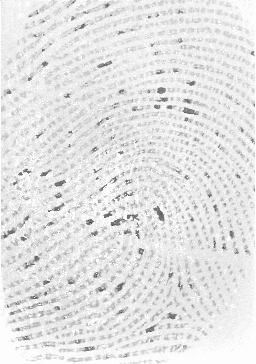
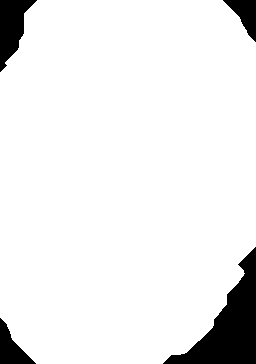
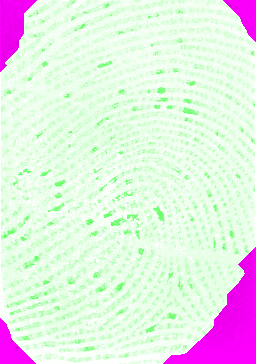

In [15]:
fingerprint = cv.imread(PATH_FVC + 'fvc2000/db2_b/110_1.png', cv.IMREAD_GRAYSCALE)
alg = pf.Gmfs()
#alg = pf.Sufs(models_folder = "../models/")
mask = alg.run(fingerprint)
show(fingerprint, mask, cv.merge((fingerprint, mask, fingerprint)))

Example: segmentation with parameters loaded from file.

,,
,,

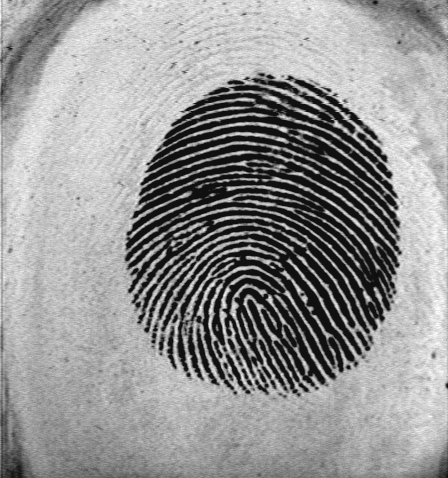
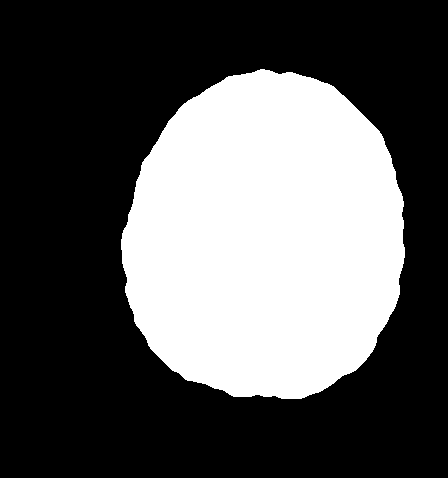
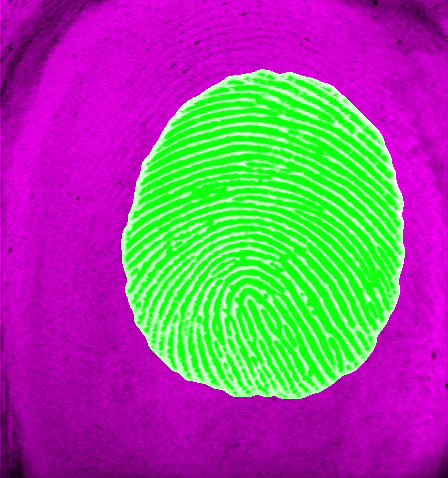

In [16]:
alg.parameters = alg.parameters.load(PATH_PARAMS + f'fvc2000_db3_b_{type(alg).__name__}_params.json')
fingerprint = cv.imread(PATH_FVC + 'fvc2000/db3_b/110_1.png', cv.IMREAD_GRAYSCALE)
mask = alg.run(fingerprint)
show(fingerprint, mask, cv.merge((fingerprint, mask, fingerprint)))

Showing intermediate steps of the segmentation algorithm:

,Gradient magnitude,Average gradient magnitude,Thresholding,After closing,Largest component,After fill holes,After opening,
,,,,,,,,

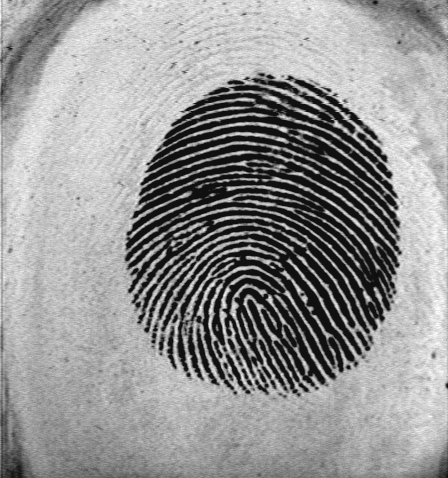
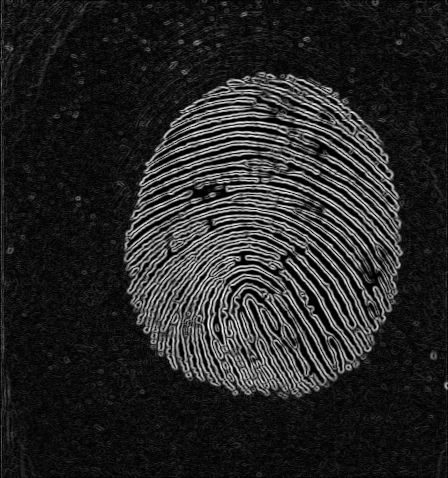
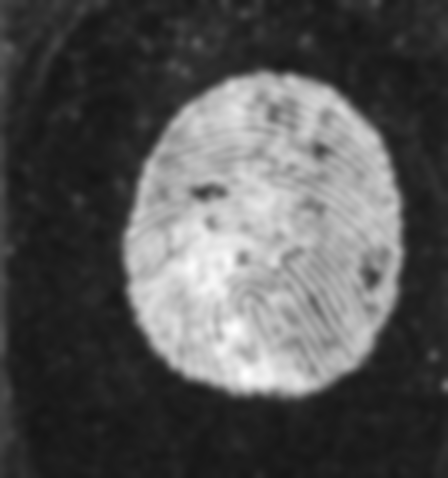
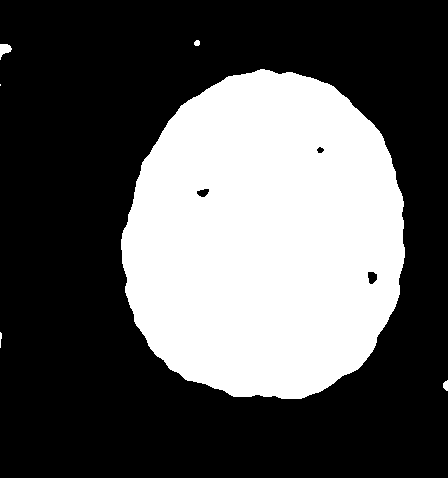
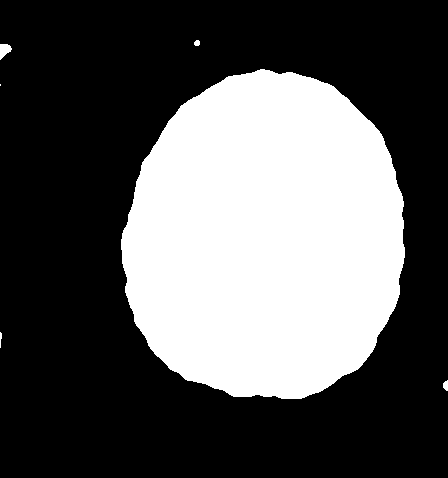
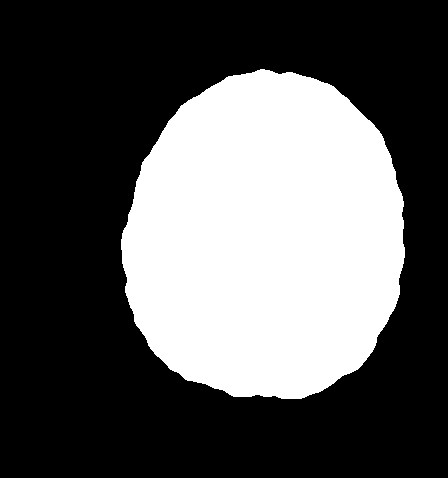
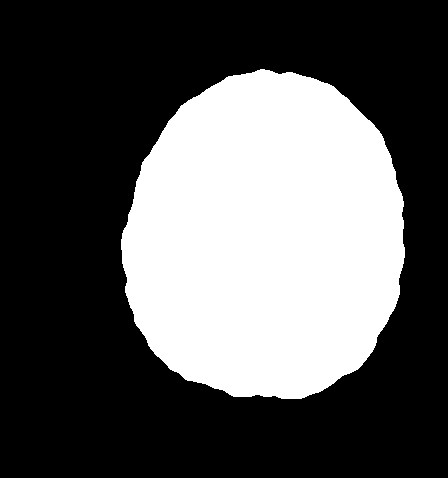
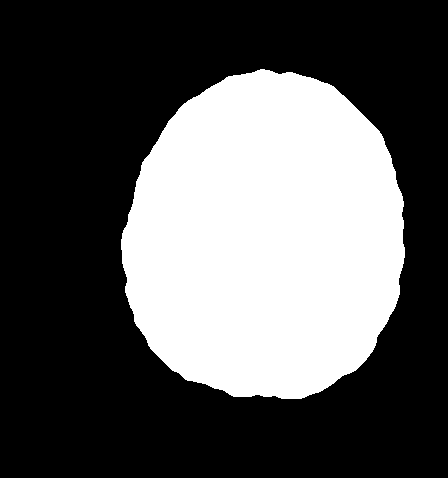
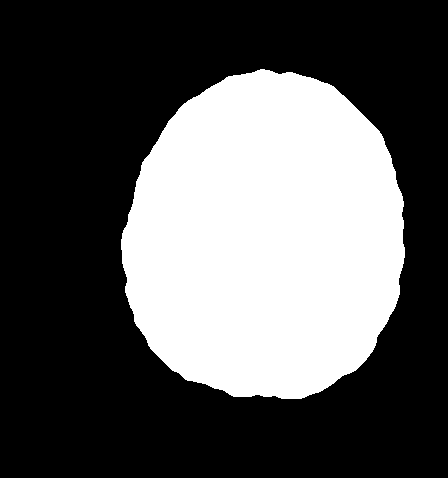

In [17]:
intermediate_results = []
mask = alg.run(fingerprint, intermediate_results)
show(fingerprint, *intermediate_results, mask)

## 2. Comparison with the groud truth

Comparing a segmentation result with the corresponding ground truth mask loaded from file.

,,,
,,,

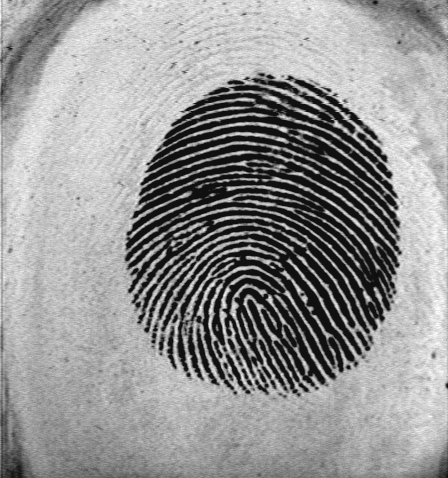
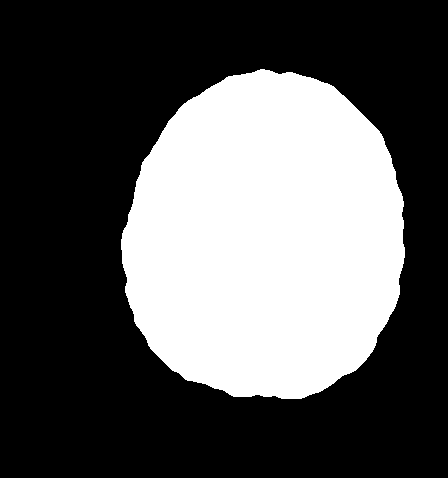
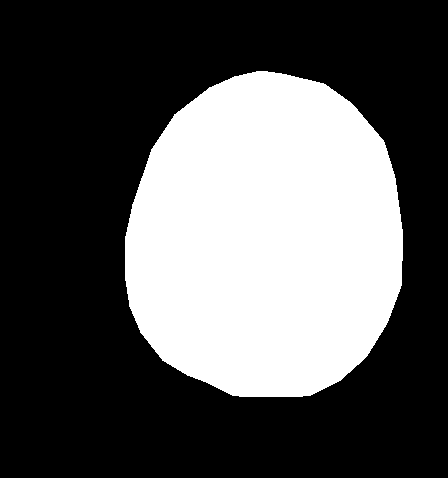
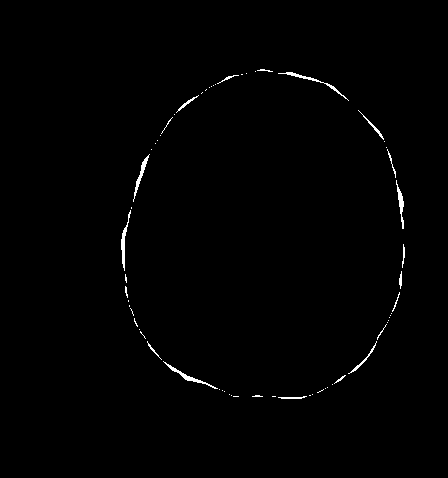

In [18]:
gt_mask = cv.bitwise_not(cv.imread(PATH_GT + 'fvc2000_db3_im_110_1seg.png', cv.IMREAD_GRAYSCALE))
show(fingerprint, mask, gt_mask, cv.bitwise_xor(mask, gt_mask))

In [19]:
e = pf.segmentation.compute_segmentation_error(mask, gt_mask)
print(f'Segmentation error of the previous example = {e*100:.2f}%')

Segmentation error of the previous example = 0.70%
